
# sat - 6-23-2018

# ch 3 linear regresion

In [35]:
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_rows = 10

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

credit = pd.read_csv('./data/Credit.csv')

credit = credit.iloc[:,1:]

In [2]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [3]:
#####################
# p 84,
# table 3.7
# male / female indicator variable

credit = pd.concat([credit,
           pd.get_dummies(credit['Gender'])],axis=1)


credit.groupby('Gender').mean()

X = credit.loc[:,['Female']]
y = credit['Balance']

X = sm.add_constant(X)

res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Sat, 30 Jun 2018   Prob (F-statistic):              0.669
Time:                        12:20:33   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        509.8031     33.128     15.389      0.0

In [4]:
### or another way to incorporate categorical variables

import statsmodels.formula.api as smf

df = credit.copy()
df
model = smf.ols("Balance ~ C(Gender)", data=df).fit()

model.summary()

model = smf.ols("Income ~ C(Gender)", data=df).fit().summary()

###############################################################

# multiple categories

smf.ols("Balance ~ C(Ethnicity)", data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Sat, 30 Jun 2018   Prob (F-statistic):              0.957
Time:                        12:20:33   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   531.0000     46.319     11.464      0.000     439.939     622.061
C(Ethnicity)[T.Asian]       -18.6863     65.021     -0.287      0.774    -146.515     109.142
C(Ethnicity)[T.Caucasian]   -12.5025     56.681     -0.221      0.826    -123.935      98.930
==============================================================================
Omnibus:                       28.829   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.395
Skew:                           0.581   Prob(JB):                     1.13e-06
Kurtosis:                       2.460   Cond. No.                         4.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
###############################################################
# 3.3.2 extenstions of the linear model
###############################################################

advertising = pd.read_csv('./data/Advertising.csv')
advertising = advertising.iloc[:,1:]

df = advertising.copy()

smf.ols('Sales ~ TV + Radio', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 30 Jun 2018   Prob (F-statistic):           4.83e-98
Time:                        12:20:34   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# adding interactions

smf.ols('Sales ~ Radio * TV', data=df).fit().summary()

# adding interactions among categorical / non-categorical variables

df_credit = credit.copy()

In [7]:
smf.ols('Balance ~ Income + C(Student)', data=df_credit).fit().summary()


model = smf.ols('Balance ~ Income + C(Student) + Income * C(Student)', data=df_credit).fit()

model.summary()
#model.coef_

model.params

income = np.arange(0,151)

line_student = model.params[0] + model.params[1] + (model.params[2]+model.params[3])*income

line_non_student = model.params[0] + (model.params[2])*income

student_vs_non_student = pd.DataFrame({'student':line_student,
              'non_student':line_non_student})

plt.plot(line_student)

########## p 90, figure 3.7

student_vs_non_student.plot()

Non-linearity - p 92
6-30-2018

In [9]:
auto = pd.read_csv('./data/Auto.csv')

In [10]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


auto.dtypes

## 3.3.3 Potential Problems (p 92)

#### 1. Non-linearity of data

Residual plots

In [25]:
auto.horsepower[auto.horsepower=='?'] = np.NaN

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [28]:
# convert horsepower to number
#auto.convert_objects(convert_numeric=True)
#auto[auto=='?'] = np.NaN
auto['horsepower'] = pd.to_numeric(auto.horsepower)
#auto['horsepower'] = auto['horsepower'].astype(float)

In [29]:
model = smf.ols('mpg ~ horsepower', data=auto).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 30 Jun 2018   Prob (F-statistic):           7.03e-81
Time:                        12:36:02   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


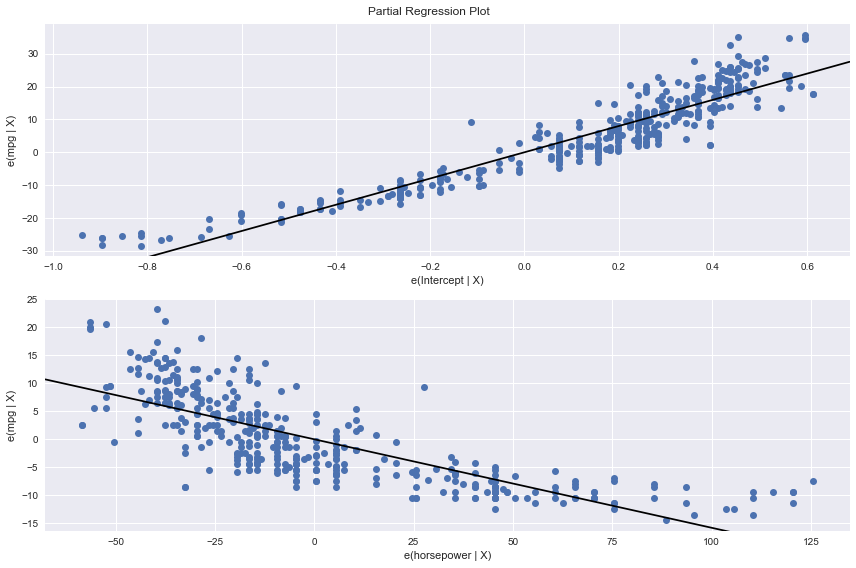

In [36]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)
fig.show()

#### lets try a normal scatter plot (Figure 3.8)

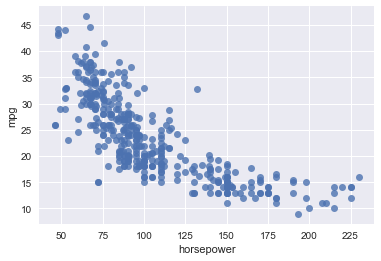

In [41]:
import seaborn as sns

sns.regplot(x='horsepower', y='mpg', data=auto,
            fit_reg = False)

#### plot fitted vs residuals

In [46]:
model.resid

0      -1.416046
1       1.108520
2       1.740849
3      -0.259151
4      -0.837598
         ...    
392     0.638786
393    12.272065
394     5.323097
395     0.533873
396     4.007407
dtype: float64

In [47]:
model.fittedvalues

0      19.416046
1      13.891480
2      16.259151
3      16.259151
4      17.837598
         ...    
392    26.361214
393    31.727935
394    26.676903
395    27.466127
396    26.992593
dtype: float64

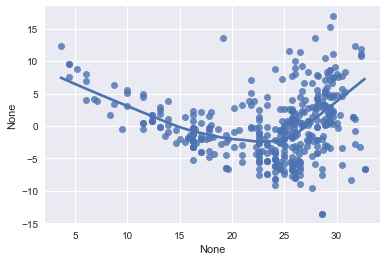

In [55]:
#fit_vs_resid = pd.concat([model.fittedvalues, model.resid],axis=1)
#fit_vs_resid.columns - ['fitted','resid']

sns.regplot(x = model.fittedvalues, y=model.resid, lowess = True) #data=fit_vs_resid)

In [ ]:
sns.regplot